# Standart packages import plus some specific to this task packages

In [1]:
from statsmodels.formula.api import ols
import pandas as pd
import scipy
import numpy as np

from statsmodels.graphics.api import abline_plot

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import cv2

In [238]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree, ensemble, learning_curve

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [67]:
from os import listdir
import cv2

In [234]:
import warnings
warnings.filterwarnings('ignore')

# Collecting the data

List with paths to images

In [4]:
len(listdir('/Users/Suh/Python_etc/CMF/Decision_trees/digits_train')[1:])

33600

In [309]:
train_pic_paths = []
for i in range(33600):
    train_pic_paths.append('/Users/Suh/Python_etc/CMF/Decision_trees/digits_train/{}.png'.format(i))

Answers's csv

In [29]:
df_answer_to_train = pd.read_csv('digits_train_values.csv')

In [30]:
df_answer_to_train.head()

,digits_values
0,7
1,4
2,5
3,5
4,0


Concatinate table with answers and images

In [18]:
pic_list = []

In [19]:
for path in train_pic_paths:
    img = cv2.imread(path, 0)
    img = ravel(img)
    pic_list.append(img)

In [22]:
df_pic = pd.DataFrame(pic_list)

In [44]:
df_pic.columns = ['pixel{}'.format(i) for i in range(784)]

In [45]:
train_table = pd.concat([df_answer_to_train, df_pic], axis = 1)

In [57]:
train_table.head()

,digits_values,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


-------------

# Divide dataset to train and test

Use simple train_test_split

In [62]:
train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(train_table.iloc[:,1:], train_table.iloc[:,0], test_size = 0.2)

K-Fold split

In [253]:
k_fold_val = cross_validation.KFold(len(train_table), n_folds = 5, shuffle = True, random_state = 1)

In [264]:
indexes = []
for train_index, test_index in k_fold_val:
    print(train_index, test_index)
    indexes.append((train_index, test_index))

[    0     1     3 ..., 33597 33598 33599] [    2     8    19 ..., 33573 33583 33587]
[    1     2     5 ..., 33596 33597 33598] [    0     3     4 ..., 33578 33581 33599]
[    0     1     2 ..., 33596 33598 33599] [    5    12    17 ..., 33594 33595 33597]
[    0     2     3 ..., 33597 33598 33599] [    1    10    21 ..., 33584 33585 33588]
[    0     1     2 ..., 33595 33597 33599] [    9    14    15 ..., 33592 33596 33598]


# Classification using one tree

In [68]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [104]:
predictions = clf.predict(test_data)

-------------

Check for accuracy

In [105]:
metrics.accuracy_score(test_labels, predictions)

0.84047619047619049

In [70]:
matrix = metrics.confusion_matrix(test_labels, predictions)
print(matrix)

[[614   0  13   2   3  11   7   8   5  11]
 [  0 717   4   5   3   5   3   2  17   1]
 [ 14   9 583  25   8   8  10  24  24   7]
 [ 11  12  17 539   7  32   3   6  34  20]
 [  2   6   6   6 528   6  10   8  19  38]
 [  8   7   5  26  14 487  22  12  25  13]
 [ 12   3  15   5  15  19 585   1  16   8]
 [  1   6  27  13   7   3   2 535   5  24]
 [ 14  14  27  38  21  14   9   7 495  22]
 [  7   6   8  23  34   2   1  22  17 565]]


In [88]:
print('Precision = ', metrics.precision_score(test_labels, predictions),\
      '\nRecall = ', metrics.recall_score(test_labels, predictions),\
      '\nF-measure = ', metrics.f1_score(test_labels, predictions))

Precision =  0.840422682741 
Recall =  0.840476190476 
F-measure =  0.840299517672


In [85]:
print(metrics.classification_report(test_labels, predictions))

             precision    recall  f1-score   support

          0       0.90      0.91      0.90       674
          1       0.92      0.95      0.93       757
          2       0.83      0.82      0.82       712
          3       0.79      0.79      0.79       681
          4       0.82      0.84      0.83       629
          5       0.83      0.79      0.81       619
          6       0.90      0.86      0.88       679
          7       0.86      0.86      0.86       623
          8       0.75      0.75      0.75       661
          9       0.80      0.82      0.81       685

avg / total       0.84      0.84      0.84      6720



# Classification using Random Forest

In [242]:
rf_clf = ensemble.RandomForestClassifier(n_estimators = 50, random_state = 1)

In [243]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf_clf, train_data, 
                                                                       train_labels, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

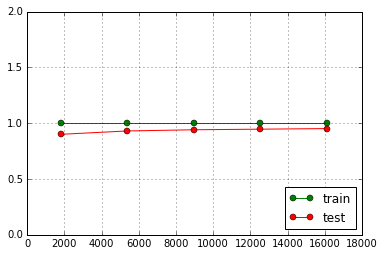

In [244]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 2))
pylab.legend(loc='lower right')

In [245]:
rf_clf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [246]:
predictions_rf = rf_clf.predict(test_data)

Check for accuracy

In [247]:
metrics.accuracy_score(test_labels, predictions_rf)

0.9598214285714286

In [248]:
print(metrics.classification_report(test_labels, predictions_rf))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       674
          1       0.98      0.99      0.98       757
          2       0.96      0.96      0.96       712
          3       0.95      0.93      0.94       681
          4       0.96      0.96      0.96       629
          5       0.96      0.95      0.96       619
          6       0.97      0.98      0.97       679
          7       0.96      0.95      0.96       623
          8       0.95      0.95      0.95       661
          9       0.94      0.94      0.94       685

avg / total       0.96      0.96      0.96      6720



Let's try our RndomForest with KFold

In [293]:
ind_set = 0
results_of_kfold = []
for i in range(10,100,10):
    k_rf_clf = ensemble.RandomForestClassifier(n_estimators = i, random_state = 1)
    train_ind, test_ind = indexes[ind_set][0], indexes[ind_set][1]
    train_dat, train_lab = train_table.iloc[train_ind,1:], train_table.iloc[train_ind,0]
    test_dat, test_lab = train_table.iloc[test_ind,1:], train_table.iloc[test_ind,0]
    k_rf_clf.fit(train_dat, train_lab)
    k_predict = k_rf_clf.predict(test_dat)
    results_of_kfold.append(
        (i, metrics.accuracy_score(test_lab, k_predict))
    )

In [294]:
results_of_kfold

[(10, 0.93348214285714282),
 (20, 0.94806547619047621),
 (30, 0.95386904761904767),
 (40, 0.95639880952380951),
 (50, 0.95550595238095237),
 (60, 0.95699404761904761),
 (70, 0.95833333333333337),
 (80, 0.95803571428571432),
 (90, 0.95803571428571432)]

In [297]:
results_of_9 = []
for i in range(10,100,10):
    nine_rf_clf = ensemble.RandomForestClassifier(n_estimators = i, random_state = 1)
    nine_rf_clf.fit(train_data, train_labels)
    nine_predict = nine_rf_clf.predict(test_data)
    results_of_9.append(
        (i, metrics.accuracy_score(test_labels, nine_predict))
    )

In [296]:
results_of_9

[(0, 0.96130952380952384),
 (1, 0.96130952380952384),
 (2, 0.96130952380952384),
 (3, 0.96130952380952384),
 (4, 0.96130952380952384),
 (5, 0.96130952380952384),
 (6, 0.96130952380952384),
 (7, 0.96130952380952384),
 (8, 0.96130952380952384),
 (9, 0.96130952380952384)]

# Final result

Take the test data

In [298]:
from skimage import io

In [306]:
len(listdir('/Users/Suh/Python_etc/CMF/Decision_trees/digits_test')[1:])

8400

In [310]:
test_pic_paths = []
for i in range(8400):
    test_pic_paths.append('/Users/Suh/Python_etc/CMF/Decision_trees/digits_test/{}.png'.format(i))

In [317]:
pic_list_test = []
for path in test_pic_paths:
    img = io.imread(path)
    img = ravel(img)
    pic_list_test.append(img)

In [321]:
test_table = pd.DataFrame(pic_list_test)

In [322]:
test_table.columns = ['pixel{}'.format(i) for i in range(784)]

Train our forest on full train_data

In [330]:
final_rf_clf = ensemble.RandomForestClassifier(n_estimators = 90, random_state = 1)

In [335]:
final_train, final_labels = train_table.iloc[:,1:], train_table.iloc[:,0]

In [336]:
final_rf_clf.fit(final_train, final_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

Make the prediction

In [338]:
final_prediction = final_rf_clf.predict(test_table)

Final table for Kaggle

In [369]:
answer_table = pd.DataFrame(list(range(len(final_prediction))))

In [371]:
answer_table.columns = ['id']

In [372]:
answer_table['digit'] = final_prediction

In [375]:
answer_table.to_csv('digit_answer.csv', index=False)

In [374]:
answer_table.head()

,id,digit
0,0,1
1,1,0
2,2,0
3,3,5
4,4,3
